## Q3: How does the number of people flying between different locations change over time?

### Importing dataset and libraries

In [1]:
import warnings
warnings.filterwarnings('ignore') # This ignores warnings that appear with ouputs

In [2]:
import numpy as np
import pandas as pd

fullset = pd.read_csv('../datasets/fullset cleaned.csv')
fullset.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

### Data Wrangling

In [3]:
Q3 = fullset[['Year', 'Month', 'Origin', 'Dest']] # Subsetting the needed columns
Q3

,Year,Month,Origin,Dest
0,2006,1,ATL,PHX
1,2006,1,ATL,PHX
2,2006,1,ATL,PHX
3,2006,1,AUS,PHX
4,2006,1,AUS,PHX
...,...,...,...,...
14279085,2007,12,MCO,ATL
14279086,2007,12,ATL,SLC
14279087,2007,12,LAX,ATL
14279088,2007,12,DFW,ATL


In [4]:
Q3['Flights'] = 1  #Creating dummy column to use for flight counts

In [5]:
# Converting Year and month into date format in one column

Q3['Date'] = pd.to_datetime(
            Q3.Month.astype(str) + "/" + Q3.Year.astype(str), 
            format='%m/%Y')

In [6]:
# The top 5 major airports in the US are Atlanta, Dallas, Denver, Chicago, Los Angeles according to world-airport-codes.com

# Selecting the routes to and from the above airports

top5 = Q3[['Date', 'Origin', 'Dest', 'Flights']][(Q3['Origin'] == 'ATL') | (Q3['Origin'] == 'DFW') | (Q3['Origin'] == 'DEN') | 
                                         (Q3['Origin'] == 'ORD') | (Q3['Origin'] == 'LAX') | 
                                         (Q3['Dest'] == 'ATL') | (Q3['Dest'] == 'DFW') | (Q3['Dest'] == 'DEN') | 
                                         (Q3['Dest'] == 'ORD') | (Q3['Dest'] == 'LAX')]

In [7]:
# Creating a function to return airport code if flight is inbound or outbound to/from respective airport

def airport(x):
    if x['Origin'] == "ATL" or x['Dest'] == "ATL":
        return "Atlanta"
    elif x['Origin'] == "DFW" or x['Dest'] == "DFW":
        return "Dallas"
    elif x['Origin'] == "DEN" or x['Dest'] == "DEN":
        return "Denver"
    elif x['Origin'] == "ORD" or x['Dest'] == "ORD":
        return "Chicago"
    elif x['Origin'] == "LAX" or x['Dest'] == "LAX":
        return "LosAngeles"
    return x

In [8]:
# Applying above function to get a new column containing corresponding airports

top5['airport'] = top5.apply(lambda x: airport(x), axis=1)

In [9]:
# Grouping by date and airport to get number of flights per month per major airport

top5 = top5[['Date', 'airport', 'Flights']].groupby(['Date', 'airport']).count().reset_index()

### Visualizing

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

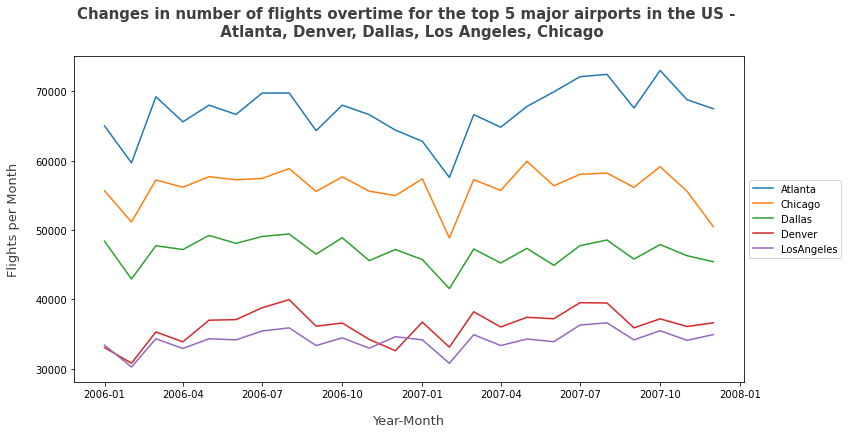

In [12]:
fig, ax=plt.subplots(1,1, figsize=(12,6))

sns.lineplot(data=top5, x='Date', y='Flights', hue='airport')

ax.set_ylabel('Flights per Month',
                 color='#404040',
                 size = 13,
                 labelpad=15)
ax.set_xlabel('Year-Month',
                 color='#404040',
                 size = 13,
                 labelpad=15)
ax.set_title("Changes in number of flights overtime for the top 5 major airports in the US - \n Atlanta, Denver, Dallas, Los Angeles, Chicago",
                color='#404040',
                size = 15,
                weight = 'bold',
                pad=20)

ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=10)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('Flights overtime.png')